In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud
from pickle import dump
from pickle import load
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from afinn import Afinn
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
def map_sentiment(rating):
    if rating <= 2:
        return 0 #negative review
    else:
        return 1 #positive review

df = pd.read_csv("../CSVInUse/HotelIndigoReview.csv")
# drop duplicated index column
df = df.iloc[:, 1:]
df['Sentiment'] = [map_sentiment(x) for x in df['Rating']]
df.head(10)

,Customer_name,Rating,Review_Title,Review,Sentiment
0,christinegH9310JS,4,Disappointed with service and staff,My daughter and I stayed at the hotel with our...,1
1,Asma,5,Amszing experience,Hotel staff is amazing. Especially Juan who re...,1
2,Gwen R,5,Great stay and very accommodating!,Loved the staff! Juan was especially helpful w...,1
3,Josh B,5,LA business meeting,Had to come for a business meeting here and lo...,1
4,Jenny W,5,Wonderful spacious rooms and valet / front des...,I love the hotel indigo. The style of the hote...,1
5,Alan H,1,Could have been great,"Objectively this is a very nice hotel but, biz...",0
6,Tracy D,5,Juan went above and beyond!,Juan was an incredible support for us getting ...,1
7,325duncans,5,Comfortable well located hotel,Hotel Indigo in DTLA is a lovely hotel - we ha...,1
8,Jojolapin,4,Very good hotel,"The hotel is super clean and the rooms too, ev...",1
9,deel330,4,"Beautiful Hotel, Rip off for Drinks","This hotel is beautiful. The rooms are lovely,...",1


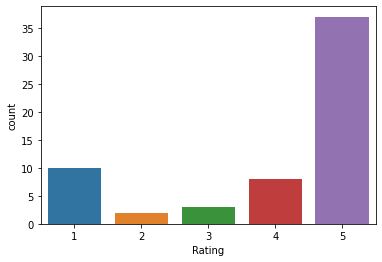

In [3]:
# generate barchart based on hotel ratings 
df = pd.read_csv("../CSVInUse/HotelIndigoReview.csv")
sns.countplot(x ='Rating', data = df)
plt.show()

In [4]:
wordnet=WordNetLemmatizer()
stop_words=stopwords.words('english')
not_stopwords = ("aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                 "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn",
                 "hasn't", "haven", "haven't", "isn", "isn't", "mustn",
                 "mustn't", "no", "not", "only", "shouldn", "shouldn't",
                 "should've", "wasn", "wasn't", "weren", "weren't", "will",
                 "wouldn", "wouldn't", "won't", "very")
stop_words_ = [words for words in stop_words if words not in not_stopwords]
stop_words_.append("I")
stop_words_.append("the")
stop_words_.append("s")
stop_words_.extend([
    "will", "always", "go", "one", "very", "good", "only", "mr", "lot", "two",
    "th", "etc", "don", "due", "didn", "since", "nt", "ms", "ok", "almost",
    "put", "pm", "till", "add", "let", "hotel", "able", "per", "st", 
    "couldn", "yet", "par", "hi", "well", "would", "I", "the", "s", 
    "also", "great", "get", "like", "take", "thank"
])
print(stop_words_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can'

In [5]:
nlp=spacy.load('en_core_web_sm')
reviewtext = []

for i in range(0, len(df)):
    df['Review_Combined'] = df['Review_Title'] + str(' ') + df['Review']
    review = re.sub('[^a-zA-Z]', ' ', df['Review_Combined'][i])
    review = review.lower()
    review = review.split()
    review = nlp(' '.join(review))
    review = [token.lemma_ for token in review]
    review = [word for word in review if word not in stop_words_]
    review = ' '.join(review)
    reviewtext.append(review)

pd.DataFrame(reviewtext).head()

,0
0,disappoint service staff daughter stay lb mini...
1,amsze experience staff amazing especially juan...
2,stay accommodate love staff juan especially he...
3,la business meeting come business meeting love...
4,wonderful spacious room valet front desk servi...


In [6]:
df['Cleaned_Review'] = reviewtext
clean_review_words = " ".join(df['Cleaned_Review'])
clean_review_words = clean_review_words.split()
all_words = len(clean_review_words)
print('Total number of words in cleaned review is {}'.format(all_words))
word_freq = nltk.FreqDist(clean_review_words)
freq_data_all = pd.DataFrame(word_freq.most_common(all_words), columns=['Word', 'Frequency'])
freq_data_all['Percentage'] = round(((freq_data_all.Frequency / freq_data_all.Frequency.sum()) * 100),2)
print('No of unique words {}'.format(len(freq_data_all)))
print(freq_data_all[0:10])
# run afn then run next histplot

Total number of words in cleaned review is 2340
No of unique words 615
     Word  Frequency  Percentage
0    stay         50        2.14
1    room         47        2.01
2     not         33        1.41
3   staff         32        1.37
4    nice         28        1.20
5      no         25        1.07
6   check         24        1.03
7   front         23        0.98
8  indigo         23        0.98
9    desk         22        0.94


<AxesSubplot:xlabel='Cleaned_Review', ylabel='Count'>

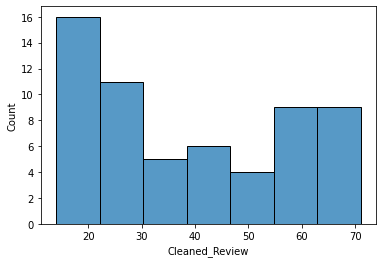

In [8]:
# generate barchart based on word count for cleaned reviews 
df['Cleaned_Review'] = pd.Series([len(item.split()) for item in df['Cleaned_Review']])
sns.histplot(df['Cleaned_Review'])

In [7]:
afn=Afinn()
score = [afn.score(item) for item in df['Cleaned_Review']]
Affin_sentiment = [1 if score > 0 else 0 for score in score]
df['Affin_score'] = score
df['Affin_sentiment'] = Affin_sentiment
df[df['Affin_sentiment'] == 0]['Cleaned_Review']
# run positive wordcloud next

0     disappoint service staff daughter stay lb mini...
5     could objectively nice bizarrely check room ch...
10    could objectively nice bizarrely check room ch...
17    bartender country stop drink bartender country...
19    modern place modern large bedroom sized bed re...
22    bartender country stop drink bartender country...
24    modern place modern large bedroom sized bed re...
27    scam need charge tesla place supercharger park...
32    scam need charge tesla place supercharger park...
37    throw money expensive run untrained gum chew t...
38    definitely not worth night many option la regr...
42    throw money expensive run untrained gum chew t...
43    definitely not worth night many option la regr...
46    not stay book room month ago request high floo...
51    not stay book room month ago request high floo...
Name: Cleaned_Review, dtype: object

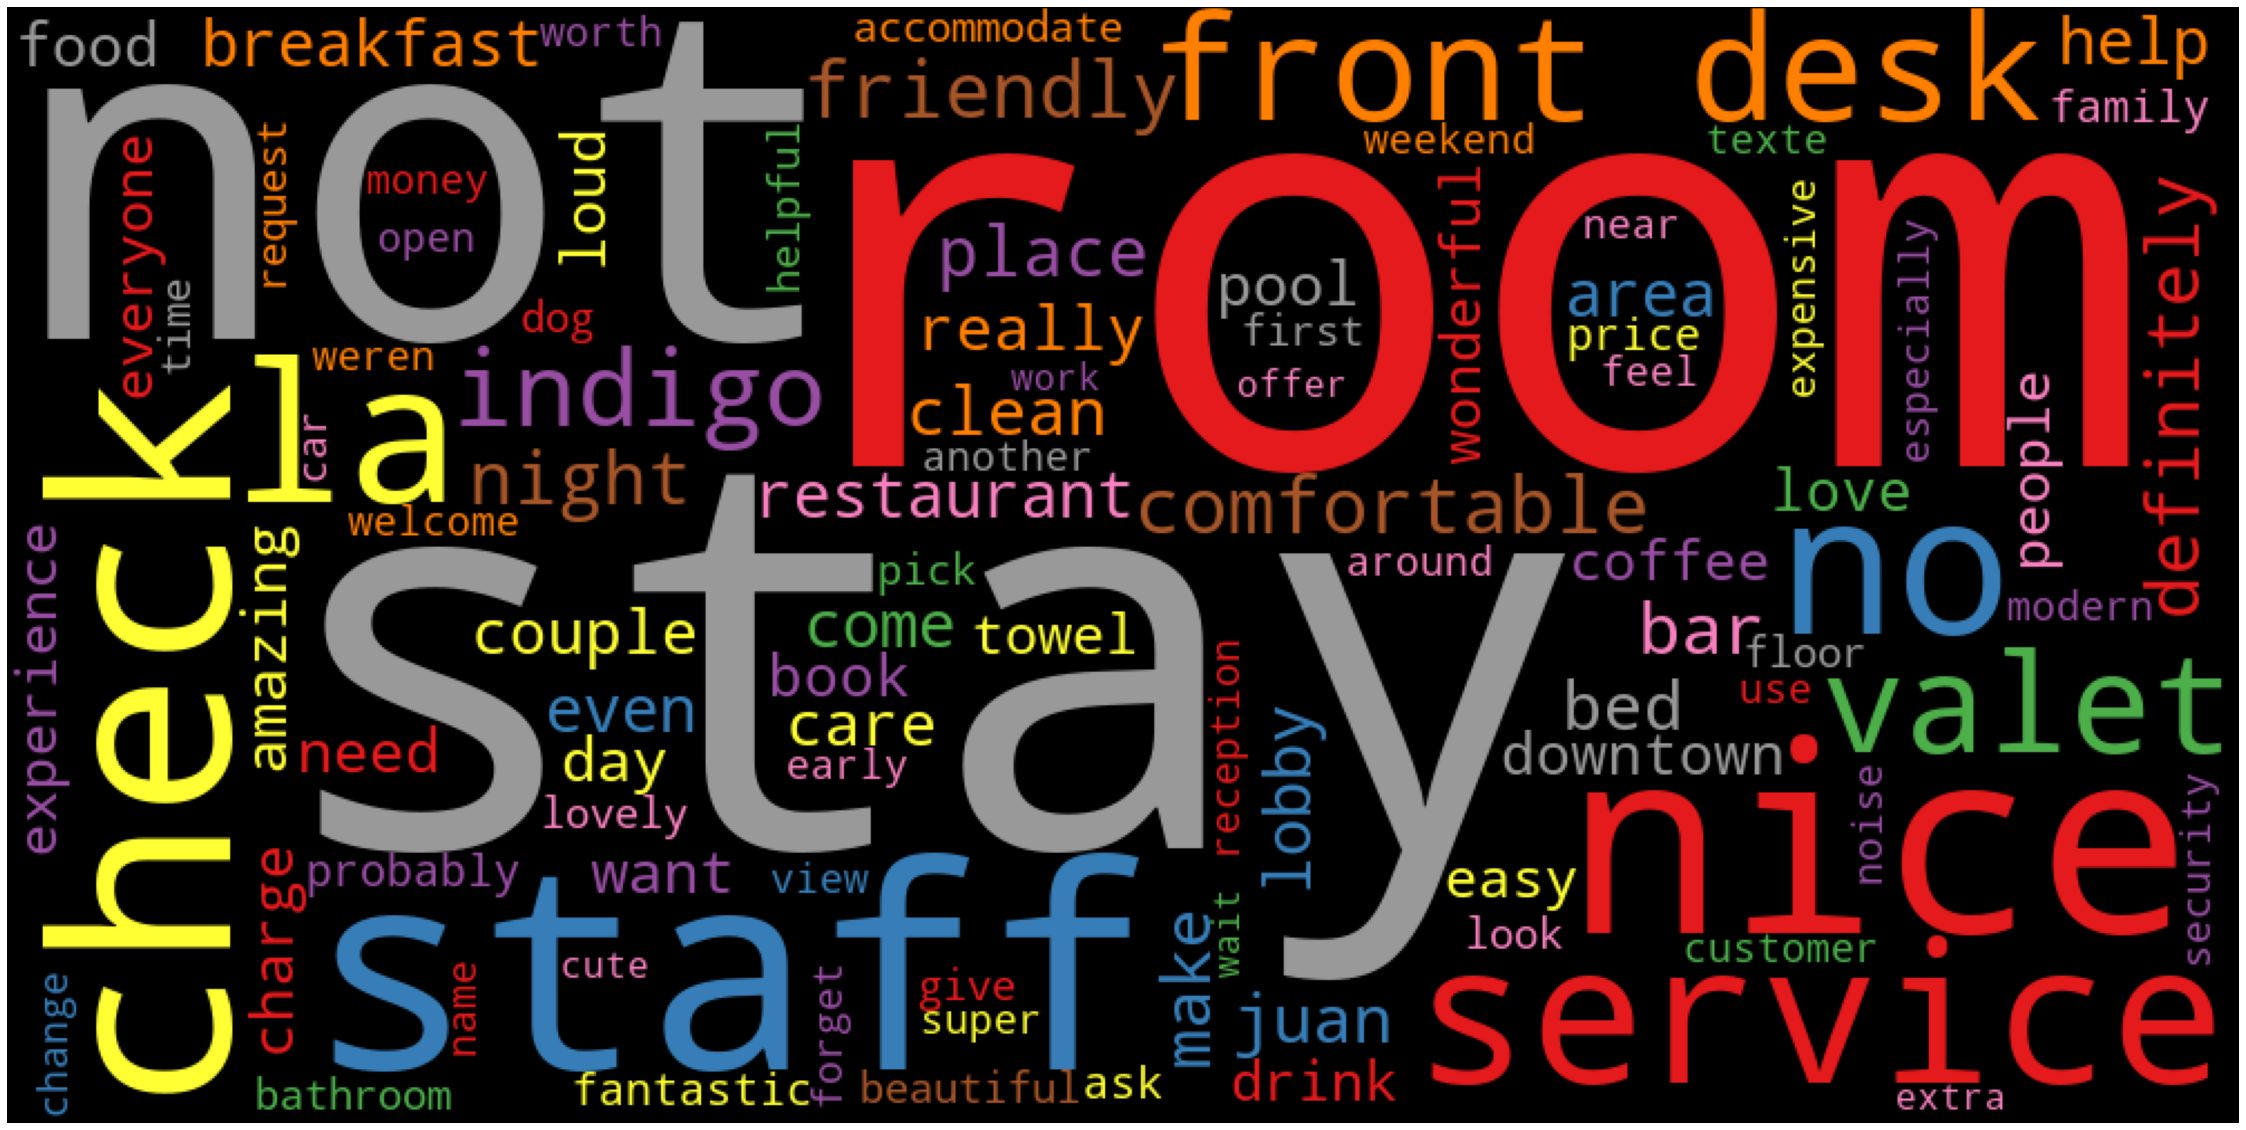

In [11]:
# generate wordcloud based on most frequently typed word in review text
wordcloud = WordCloud(
    width=1000,
    height=500,
    colormap='Set1',
    stopwords=stop_words_,
    max_words=100
).generate(str(reviewtext))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

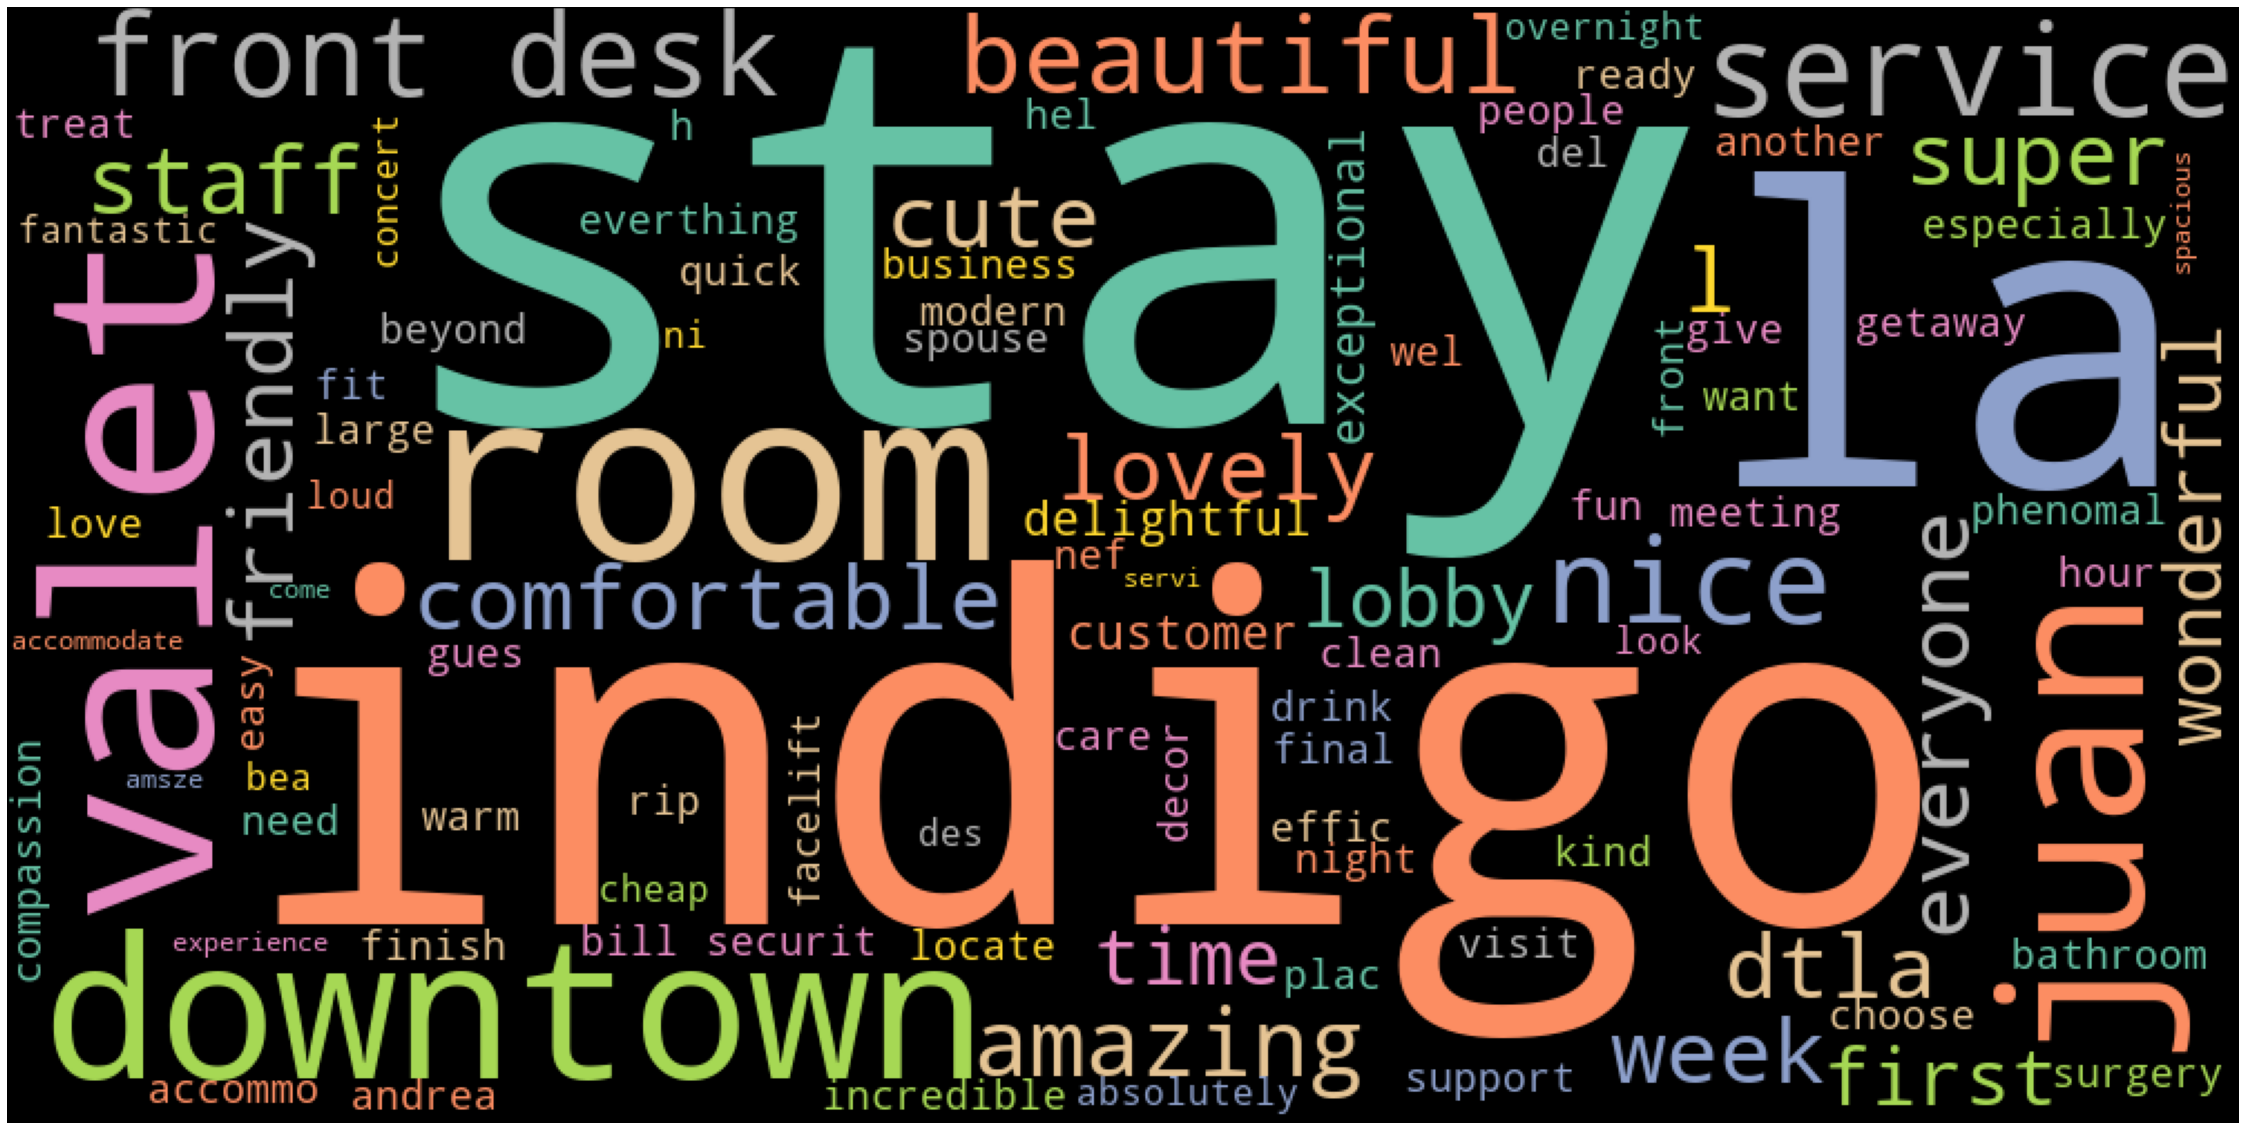

In [12]:
# generate wordcloud based on most frequently typed word in positive sentiment review text
wordcloud = WordCloud(
    width=1000,
    height=500,
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100
).generate(str(df[df['Affin_sentiment'] == 1]['Cleaned_Review']))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
# run afinn again before running this wordcloud
plt.show()

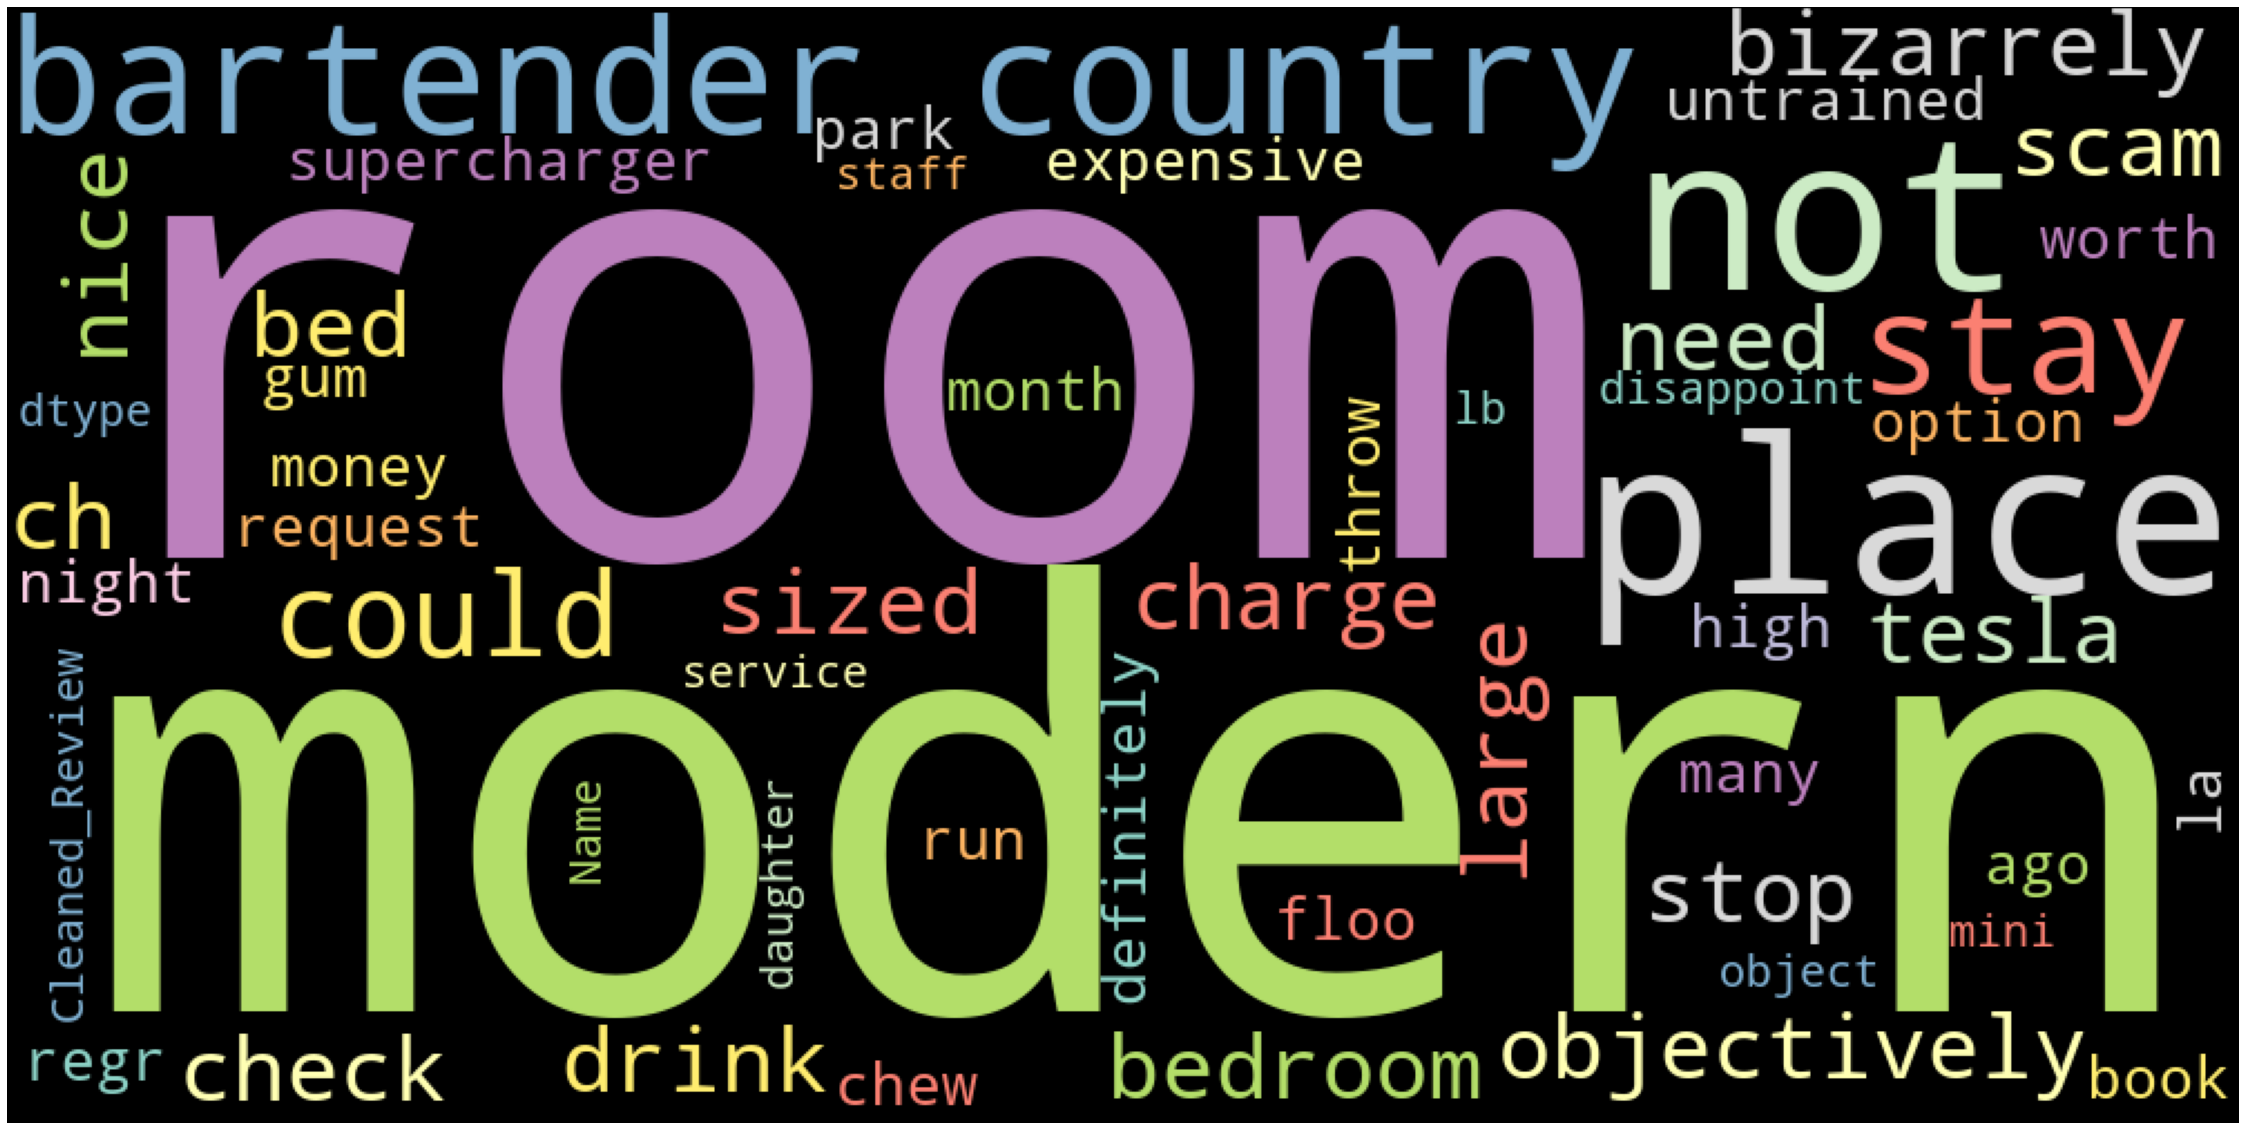

In [13]:
# generate wordcloud based on most frequently typed word in negative sentiment review text
wordcloud = WordCloud(
    width=1000,
    height=500,
    colormap='Set3',
    stopwords=stop_words_,
    max_words=100
).generate(str(df[df['Affin_sentiment'] == 0]['Cleaned_Review']))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'review terms by frequency'}>

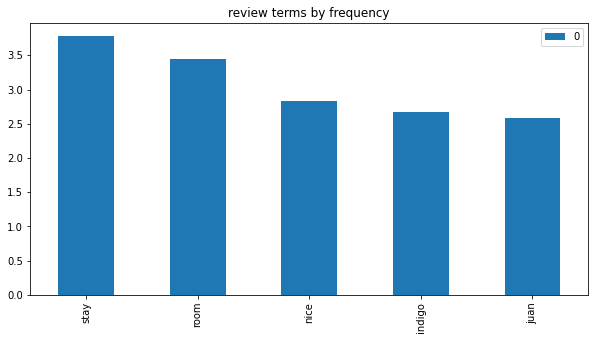

In [14]:
# generate barchart based on review text term frequency
tfidf2 = TfidfVectorizer(norm="l2", analyzer='word', stop_words=stop_words_, ngram_range=(1,1))
tfidf2_x = tfidf2.fit_transform(reviewtext)
termfreq = pd.DataFrame(tfidf2_x.sum(axis=0), columns=tfidf2.get_feature_names()).T.sort_values(0, ascending=False).head()
termfreq.plot(kind='bar', title='review terms by frequency', figsize=(10, 5))

In [8]:
# machine learning model function
def c_matrix(X_train, X_test, y_train, y_test, model):
    # make prediction
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    # test accuracy
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Accuracy for Train set {}'.format(accuracy_train))
    print('Accuracy for Test set {}'.format(accuracy_test))
    # f1 score = 2 * (precision * recall) / (precision + recall)
    f1_score = metrics.f1_score(y_train, predict_train)
    # print 1 can classify observation into correct class vs 0 cannot
    print('F1 Score {}'.format(f1_score))
    print(classification_report(y_test, predict_test))
    plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, cmap = 'rainbow')
    plt.grid(False)
# oversampling 
over = SMOTE(sampling_strategy=1, random_state=0)
# convert word token to feature vector for vocab input 
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,1))
review_tfidf = tfidf.fit_transform(reviewtext)
X_over, y_over = over.fit_resample(review_tfidf, df['Affin_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=7, test_size=0.20, stratify=y_over)


Accuracy for Train set 1.0
Accuracy for Test set 1.0
F1 Score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



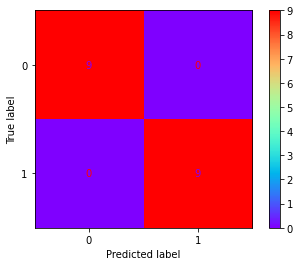

In [17]:
# regression test
model_lr = LogisticRegression(C=5, penalty='l2', random_state=0)
model_lr.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_lr)

Accuracy for Train set 0.5416666666666666
Accuracy for Test set 0.5
F1 Score 0.15384615384615385
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         9
           1       0.00      0.00      0.00         9

    accuracy                           0.50        18
   macro avg       0.25      0.50      0.33        18
weighted avg       0.25      0.50      0.33        18



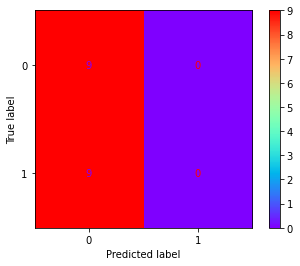

In [16]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_knn)

Accuracy for Train set 1.0
Accuracy for Test set 1.0
F1 Score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



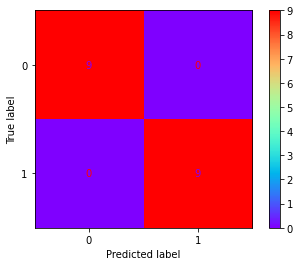

In [23]:
# Naive Bayes
model_naive = MultinomialNB(alpha=1000)
model_naive.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_naive)

Accuracy for Train set 1.0
Accuracy for Test set 1.0
F1 Score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



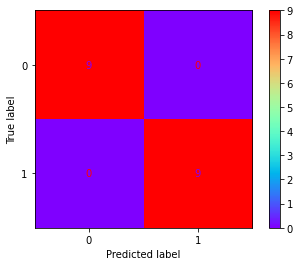

In [19]:
# Support Vector Classifier 
model_svc = SVC(kernel='linear', probability=True)
model_svc.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_svc)

Accuracy for Train set 1.0
Accuracy for Test set 1.0
F1 Score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



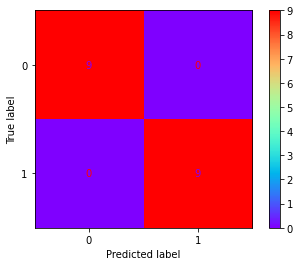

In [13]:
# Random Forest Classifier
model_rfc = RandomForestClassifier(n_estimators=100)
model_rfc.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_rfc)

In [20]:
#prediction probability 
r_probs = [0 for _ in range(len(y_test))] 
rf_probs = model_rfc.predict_proba(X_test) 
NB_probs = model_naive.predict_proba(X_test) 
knn_probs = model_knn.predict_proba(X_test) 
lr_probs = model_lr.predict_proba(X_test)
svc_probs = model_svc.predict_proba(X_test) 

#positive outcome is kept 
rf_probs = rf_probs[:,1] 
NB_probs = NB_probs[:,1] 
knn_probs = knn_probs[:,1] 
lr_probs = lr_probs[:,1]
svc_probs = svc_probs[:,1]

#compute AUROC Values 
from sklearn.metrics import roc_curve, roc_auc_score 
r_auc = roc_auc_score(y_test, r_probs) 
rf_auc = roc_auc_score(y_test, rf_probs) 
NB_auc = roc_auc_score(y_test, NB_probs) 
knn_auc = roc_auc_score(y_test, knn_probs) 
lr_auc = roc_auc_score(y_test, lr_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
 
#displace AUROC scores 
print("Random Prediction: AUROC = %.3f" %(r_auc)) 
print("Random Forest: AUROC = %.3f" %(rf_auc)) 
print("Naive Bayes: AUROC = %.3f" %(NB_auc)) 
print("K Nearest Neighbors: AUROC = %.3f" %(knn_auc))
print("Logistic Regression: AUROC = %.3f" %(lr_auc))
print("Support Vector Classifier: AUROC = %.3f" %(svc_auc))

Random Prediction: AUROC = 0.500
Random Forest: AUROC = 1.000
Naive Bayes: AUROC = 1.000
K Nearest Neighbors: AUROC = 0.778
Logistic Regression: AUROC = 1.000
Support Vector Classifier: AUROC = 1.000


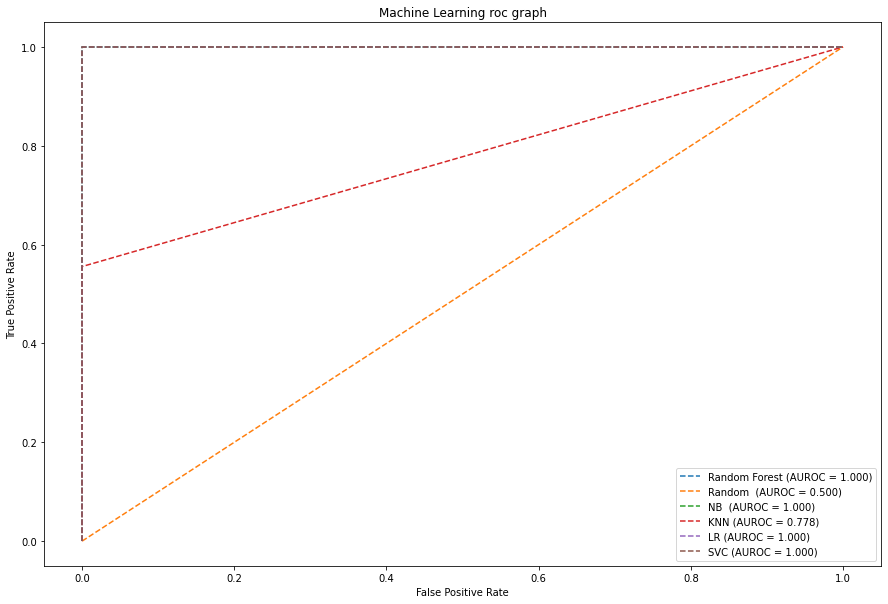

In [21]:
#calculate roc curve 
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs) 
r_fpr , r_tpr, _ = roc_curve(y_test, r_probs ) 
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)  
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_probs) 
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs) 
#plotting/title/axis label 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10)) 
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (AUROC = %0.3f)' %rf_auc) 
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random  (AUROC = %0.3f)' %r_auc) 
plt.plot(NB_fpr, NB_tpr, linestyle='--', label='NB  (AUROC = %0.3f)' %NB_auc) 
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN (AUROC = %0.3f)' %knn_auc) 
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='LR (AUROC = %0.3f)' %lr_auc) 
plt.plot(svc_fpr, svc_tpr, linestyle='--', label='SVC (AUROC = %0.3f)' %svc_auc) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Machine Learning roc graph') 
#show legend 
plt.legend() 
plt.show ()